# This was done according to example 5 in Supplementary-RNAseq-practical.pdf

In [1]:
install.packages("BiocManager")
library(BiocManager)
BiocManager::install("DESeq2")
library("DESeq2")  #This is the import for python

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.9 (BiocManager 1.30.8), R 3.6.1 (2019-07-05)
Installing package(s) 'BiocVersion', 'DESeq2'
also installing the dependencies ‘ellipsis’, ‘rlang’, ‘zeallot’, ‘bit’, ‘vctrs’, ‘bitops’, ‘bit64’, ‘blob’, ‘memoise’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘XML’, ‘checkmate’, ‘GenomeInfoDb’, ‘XVector’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘AnnotationDbi’, ‘annotate’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘Hmisc’, ‘RcppArmadillo’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'askpass', 'backports', 'boot', 'callr', 'caret', 'clipr',
  'cluster', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',


In [3]:
install.packages("BiocManager")
library(BiocManager)
BiocManager::install("edgeR")
library("edgeR")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.9 (BiocManager 1.30.8), R 3.6.1 (2019-07-05)
Installing package(s) 'edgeR'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'askpass', 'backports', 'boot', 'callr', 'caret', 'clipr',
  'cluster', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',
  'foreach', 'foreign', 'formatR', 'fs', 'ggplot2', 'glmnet', 'gower', 'haven',
  'hexbin', 'hms', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'ipred',
  'IRkernel', 'iterators', 'KernSmooth', 'knitr', 'later', 'lava', 'markdown',
  'MASS', 'mgcv', 'mime', 'modelr', 'nlme', 'numDeriv', 'openssl', 'pillar',
  'pkgconfig', 'processx', 'progress', 'promises', 'purrr', 'quantmod', 'Rcpp',
  'recipes', 'repr', 'reprex', 'rmarkdown', 'rvest', 'shiny', 'sys', 'tibble',
  'tidyr', 'tinytex', 'TTR', 'whisker', 'xfun', 'xml2'
Loading required package: limma


## If you have installed BiocManager to the Anaconda Environment this works perfect

In [1]:
library(BiocManager)
library('edgeR')

Loading required package: limma


In [3]:
dir()
getwd()

[1] "12859_2016_Article_1457.pdf"           
 [2] "document.pdf"                          
 [3] "Exploratory data analysis (copy).ipynb"
 [4] "Exploratory data analysis.ipynb"       
 [5] "Intro2RNAseq copy.pdf"                 
 [6] "Intro2RNAseq.pdf"                      
 [7] "project description.docx"              
 [8] "R.ipynb"                               
 [9] "raw_countst.sec"                       
[10] "raw_countstdl.sec"                     
[11] "raw_countstdl.sec copy"                
[12] "RNA-Seq_project.pdf"                   
[13] "Supplementary-RNAseq-practical.pdf"

[1] "/home/dimitri/ownCloud/Lectures/Programming for Life Sciences/EukaryoticTranscriptomics"

## Important!

rename treat to trt in .sec file

In [4]:
x <- read.delim("raw_countst.sec",row.names=1,stringsAsFactors=FALSE)
head(x)

,ctl1,ctl2,ctl3,ctl4,trt1,trt2,trt3,trt4
ENSMUSG00000102693,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,1,0,0,0
ENSMUSG00000051951,2,0,1,1,11,2,1,24
ENSMUSG00000102851,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0


In [6]:
Treat <- factor(substring(colnames(x),1,3))
Treat <- relevel(Treat, ref='ctl')
Time <- factor(substring(colnames(x),4,4))

In [7]:
# Create DGEList object
y <- DGEList(counts=x,group=Treat)

In [10]:
keep <- filterByExpr(y)
z <- y[keep, , keep.lib.sizes=FALSE]

In [11]:
z <- calcNormFactors(z)

In [12]:
# how to name group as ctl and treat
z$samples

,group,lib.size,norm.factors
ctl1,ctl,41354826,0.9529242
ctl2,ctl,34584886,0.9774164
ctl3,ctl,35459391,1.0160967
ctl4,ctl,37095889,0.9948952
trt1,trt,39989405,1.0310074
trt2,trt,36877683,0.9849949
trt3,trt,40271257,1.0715532
trt4,trt,173486417,0.9759783


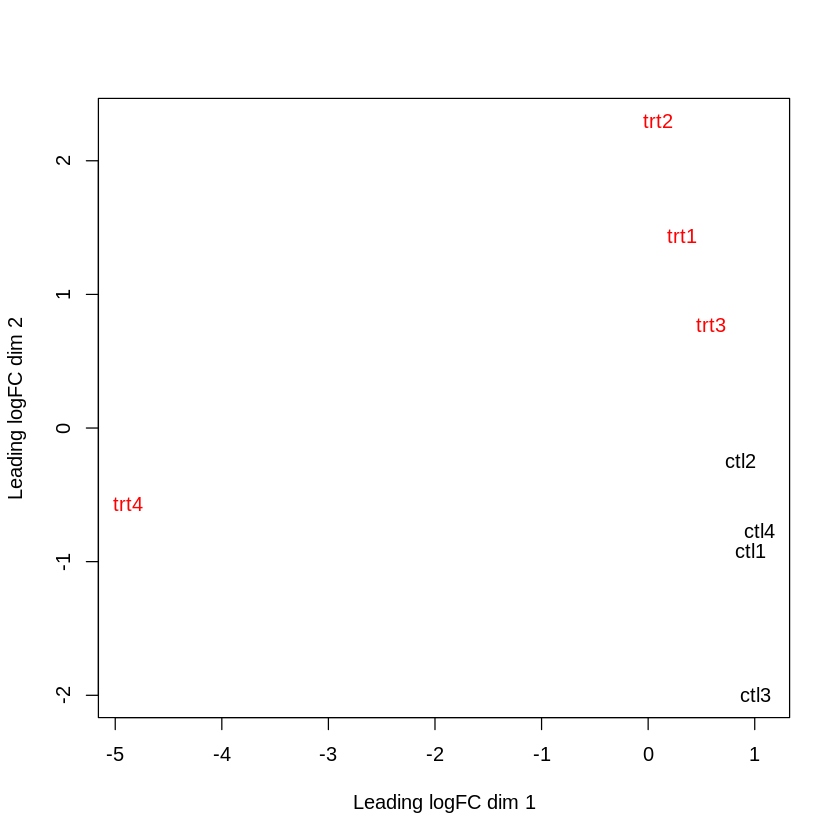

In [13]:
plotMDS(z,col=rep(1:2, each=4))

In [16]:
design <- model.matrix(~Time+Time:Treat) #Tilde no minus!! Tilde takes a specific column

In [18]:
logFC <- predFC(z,design,prior.count=1,dispersion=0.05)

In [19]:
cor(logFC[,5:8])

,Time1:Treattrt,Time2:Treattrt,Time3:Treattrt,Time4:Treattrt
Time1:Treattrt,1.0000000,0.2597664,0.6361607,0.3100181
Time2:Treattrt,0.2597664,1.0000000,0.4250039,0.3036842
Time3:Treattrt,0.6361607,0.4250039,1.0000000,0.3270622
Time4:Treattrt,0.3100181,0.3036842,0.3270622,1.0000000


Before we fit GLMs, we need to define our design matrix based on the experimental design. We want to
test for differential expressions between 4hrcC challenged and mock-inoculated samples within batches,
i.e. adjusting for differences between batches. In statistical terms, this is an additive linear model. So
the design matrix is created as:

In [21]:
design <- model.matrix(~Time+Treat)
rownames(design) <- colnames(z)
design

,(Intercept),Time2,Time3,Time4,Treattrt
ctl1,1,0,0,0,0
ctl2,1,1,0,0,0
ctl3,1,0,1,0,0
ctl4,1,0,0,1,0
trt1,1,0,0,0,1
trt2,1,1,0,0,1
trt3,1,0,1,0,1
trt4,1,0,0,1,1


In [24]:
z <- estimateGLMCommonDisp(z, design, verbose=TRUE)

Disp = 0.21328 , BCV = 0.4618 


The square root of dispersion is the coefficient of biological variation (BCV). The common BCV is on
the high side, considering that this is a designed experiment using genetically identical plants.
Now estimate genewise dispersion estimates, allowing for a possible abundance trend:

In [25]:
z <- estimateGLMTrendedDisp(z, design)
z <- estimateGLMTagwiseDisp(z, design)

The genewise dispersions show a decreasing trend with expression level. At low logCPM, the dispersions
are very large indeed:

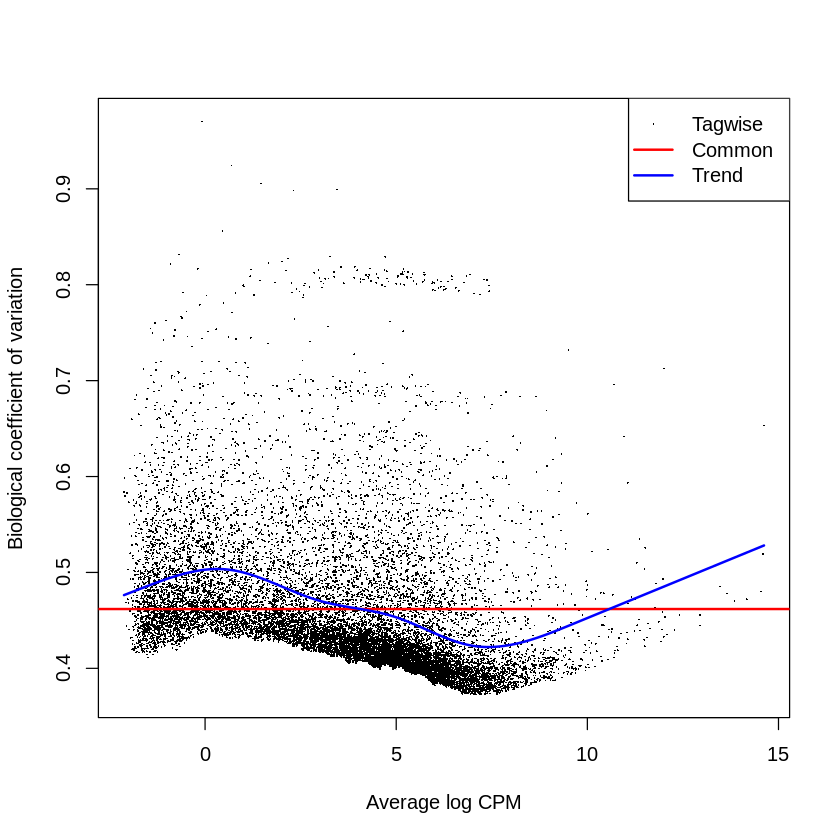

In [26]:
plotBCV(z)

## Differential Expression
Now proceed to determine differentially expressed genes. Fit genewise glms:

In [27]:
fit <- glmFit (z, design)

First we check whether there was a genuine need to adjust for the experimental times. We do this by
testing for differential expression between the three times. There is considerable differential expression,
justifying our decision to adjust for the batch effect:

In [30]:
lrt <- glmLRT(fit, coef=2:4)
topTags(lrt)


,logFC.Time2,logFC.Time3,logFC.Time4,logCPM,LR,PValue,FDR
ENSMUSG00000032532,6.417511,1.43903894,5.009131,5.2220306,108.52367,2.280521e-23,3.417133e-19
ENSMUSG00000062345,8.039959,1.01610573,6.255506,3.0037177,92.48878,6.396209e-20,4.792040e-16
ENSMUSG00000049593,7.079733,-0.55180377,5.375384,0.6915338,86.41996,1.286269e-18,6.424486e-15
ENSMUSG00000042745,5.729975,-0.44699430,3.056552,2.9875184,83.46937,5.529323e-18,2.071284e-14
ENSMUSG00000042124,7.187582,-0.03168627,4.274929,0.7931691,75.88430,2.341879e-16,7.018143e-13
ENSMUSG00000026475,3.965082,-1.15438470,2.704170,5.8602690,75.11121,3.429810e-16,8.565380e-13
ENSMUSG00000032487,3.910195,-1.34328080,2.432465,7.0167399,72.01650,1.578997e-15,3.379956e-12
ENSMUSG00000027913,4.961158,0.78111144,3.599711,2.8223456,62.96944,1.363340e-13,2.553536e-10
ENSMUSG00000046676,5.845830,0.70987869,4.502335,1.2732675,60.94009,3.701507e-13,6.162599e-10
ENSMUSG00000007872,3.841998,0.30044346,2.184915,5.0685075,54.19077,1.021717e-11,1.530940e-08


In [31]:
FDR <- p.adjust(lrt$table$PValue, method="BH")
sum(FDR < 0.05)

[1] 161

Now conduct likelihood ratio tests for the pathogen effect and show the top genes. By default, the test
is for the last coefficient in the design matrix, which in this case is the treatment effect:

In [32]:
lrt <- glmLRT(fit)
topTags(lrt)

,logFC,logCPM,LR,PValue,FDR
ENSMUSG00000000120,-6.821911,6.334550,151.50094,8.145191e-35,1.220475e-30
ENSMUSG00000050272,-9.211591,4.966541,116.06081,4.609443e-27,3.453395e-23
ENSMUSG00000040026,6.893015,7.911629,110.32996,8.296511e-26,4.143831e-22
ENSMUSG00000028339,-5.631233,6.387413,105.11781,1.150860e-24,4.311122e-21
ENSMUSG00000035385,4.665404,7.256308,104.57314,1.514967e-24,4.540052e-21
ENSMUSG00000034009,-7.272913,3.196901,94.89342,2.009166e-22,5.017557e-19
ENSMUSG00000009185,4.031995,6.891702,82.03491,1.337039e-19,2.862029e-16
ENSMUSG00000026725,4.387969,5.079137,81.54883,1.709844e-19,3.038496e-16
ENSMUSG00000016494,-4.788800,7.047843,81.41997,1.825044e-19,3.038496e-16
ENSMUSG00000031722,4.893248,3.368387,79.74688,4.255825e-19,6.376929e-16


Here’s a closer look at the individual counts-per-million for the top genes. The top genes are very
consistent across the three replicates:

In [34]:
top <- rownames(topTags(lrt))
cpm(z)[top,]

,ctl1,ctl2,ctl3,ctl4,trt1,trt2,trt3,trt4
ENSMUSG00000000120,189.5046067,67.240894,221.8418575,160.1613890,1.64930957,0.6056547,3.7077551,0.73825159
ENSMUSG00000050272,54.7858123,28.103321,104.4680034,62.0757473,0.09701821,0.3028273,0.1158673,0.01771804
ENSMUSG00000040026,2.5883061,5.738994,1.4709894,2.8450255,737.62945086,361.4932662,60.1351532,753.89070877
ENSMUSG00000028339,113.3018303,168.649510,199.1664168,172.3001645,1.40676405,1.7619046,6.2568367,6.71513644
ENSMUSG00000035385,7.6380405,24.109691,3.7468598,10.1608054,184.50438092,536.8027719,77.8396838,377.84897433
ENSMUSG00000034009,6.2677608,4.614861,45.3786359,16.5553390,0.07276366,0.1376488,0.1390408,0.03543608
ENSMUSG00000009185,18.0927671,13.223352,10.0748898,12.3826349,242.23021589,228.1391133,132.5058982,292.83782756
ENSMUSG00000026725,7.2574073,1.567870,0.2775452,3.1430758,142.73804151,32.2648776,5.2835510,77.44554450
ENSMUSG00000016494,217.5192138,177.435496,384.2335387,230.9618812,3.92923751,3.7715770,25.0273470,15.47375327
ENSMUSG00000031722,0.6597643,1.567870,0.1110181,0.7586735,20.71338784,34.5773774,8.3192755,15.55643744


The total number of genes significantly up-regulated or down-regulated at 5% FDR is summarized as
follows:

In [35]:
summary(dt <- decideTestsDGE(lrt))

       Treattrt
Down        243
NotSig    14195
Up          546

We can pick out which genes are DE:

In [36]:
isDE <- as.logical(dt)
DEnames <- rownames(y)[isDE]

Then we can plot all the logFCs against average count size, highlighting the DE genes:

(The blue lines indicate 2-fold up or down.)

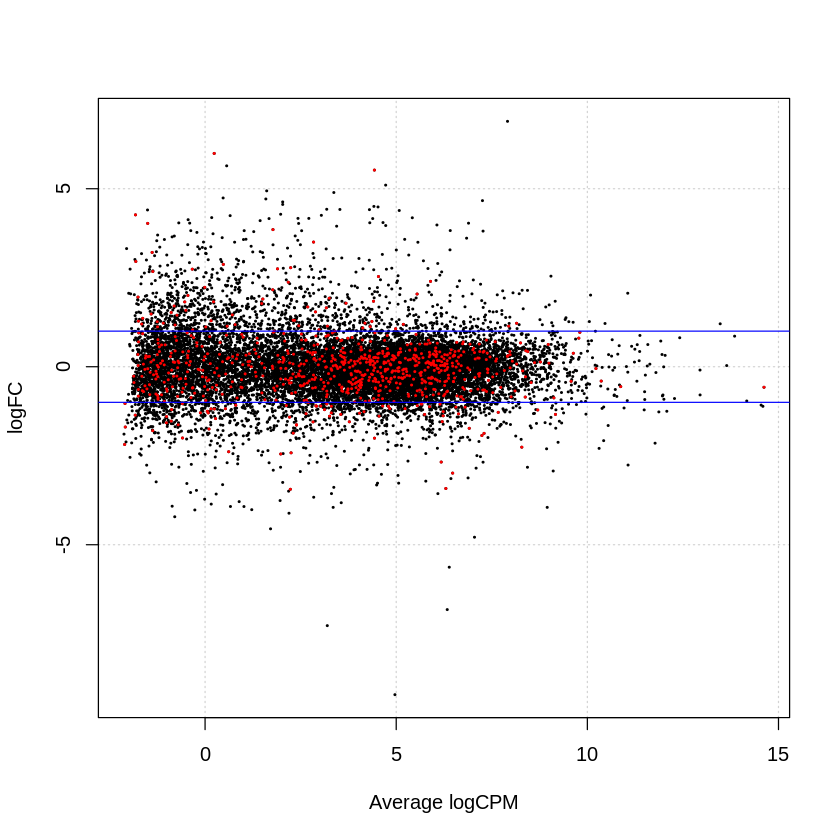

In [37]:
plotSmear(lrt, de.tags=DEnames)
abline(h=c(-1,1), col="blue")